# **AIN 214 - PA2 - FALL 2025**

**Student Number** :2240765048

**Name Surname**   :Demir Emiroğlu


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 24.11.2025 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>

# **Necessary Imports**

In [1]:
# Import required python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3

# **PART- 1**

**Superstore Sales Management System (50 Points)**



For this part, you will use a dataset from a Superstore retail company. The dataset includes comprehensive information about customers, products, orders, and sales operations across different regions in the United States.

**Dataset Entities**

* **Customers**: The system contains detailed customer profiles including customer ID, name, and segment information (Consumer, Corporate, Home Office). Understanding customer demographics and purchasing behavior is essential for targeted marketing and customer relationship management.

* **Products**: A comprehensive catalog of all products sold by the superstore. Each product record includes a unique product ID, product name, category (Furniture, Office Supplies, Technology), and sub-category. This information is crucial for inventory management, product performance analysis, and strategic planning.

* **Locations**: Geographic information about where customers are located and where orders are shipped. Includes city, state, postal code, region (Central, East, South, West), and country. This data enables regional sales analysis and helps optimize distribution and shipping strategies.

* **Orders**: Tracks all purchase transactions made by customers. Each order contains the order date, ship date, shipping mode (Standard Class, Second Class, First Class, Same Day), and links to customer and location information. This serves as the foundation for analyzing sales trends, shipping efficiency, and customer purchasing patterns.

* **Order Details**:  Detailed line items for each order, recording which products were purchased, quantity, sales amount, discount applied, and profit generated. This granular data is essential for profitability analysis, discount impact assessment, and understanding product performance at the transaction level.


This dataset will be used to design a normalized relational database for managing retail operations. Your task is to build an efficient database schema, establish proper relationships between tables, and write SQL queries to extract meaningful business insights.


**Dataset Columns**

* **Row ID**: Unique identifier for each row in the dataset (sequential number)
* **Order ID**: Unique identifier for each order (format: XX-YYYY-NNNNNN). Multiple rows can have the same Order ID if the order contains multiple products
* **Order Date**: Date when the order was placed by the customer (format: MM/DD/YYYY)
* **Ship Date**: Date when the order was shipped to the customer (format: MM/DD/YYYY)
* **Ship Mode**: Shipping method selected for the order (Standard Class, Second Class, First Class, Same Day)
* **Customer ID**: Unique identifier for each customer (format: XX-NNNNN)
* **Customer Name**: Full name of the customer who placed the order
* **Segment**: Customer segment classification (Consumer, Corporate, Home Office)
* **Country**: Country where the customer is located (all orders are from United States)
* **City**: City name where the order is being shipped
* **State**: US state where the order is being shipped (2-letter state code)
* **Postal Code**: ZIP code of the delivery location (5-digit postal code)
* **Region**: Geographic region classification (Central, East, South, West)
* **Product ID**: Unique identifier for each product (format: XXX-XX-NNNNNNN)
* **Category**: High-level product category (Furniture, Office Supplies, Technology)
* **Sub-Category**: Detailed product classification within the category (e.g., Chairs, Phones, Binders)
* **Product Name**: Full descriptive name of the product
* **Sales**: Revenue generated from the product sale in US Dollars ($)
* **Quantity**: Number of units of the product purchased in the order
* **Discount**: Discount rate applied to the product (decimal value between 0 and 1, where 0.2 = 20% discount)
* **Profit**: Profit earned from the sale after deducting costs and discounts in US Dollars ($). Can be negative if the sale resulted in a loss

---


**Dataset Path:** "Data/Sample - Superstore.csv"
  
---

**Technical Requirements**
* **Databas**: Use sqlite3 Python package for in-memory database management
* **Libraries**: Use pandas for data manipulation

**Note** You can use either pandas or sqlite3 for query execution.

---
**Notes on Database Implementation**

All database operations should be performed in-memory using SQLite. This means:
* Database exists only during program execution
* No persistent file is created
* Fast performance for analysis tasks
* Connection should remain open throughout all questions

---

### Q1. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database(10pts).

Your database design here
---
---
***Example Table***:


| Column   | Type  | Key      | Description                              |
|----------|-------|----------|------------------------------------------|
| ID       | INTEGER| PK      | Unique identifier table1                 |
| ID2      | INTEGER| FK      | identifier table2                        |
| Name     | TEXT   |         | patient name                             |
| FOREIGN KEY (ID2) REFERENCES table2(ID2)     |    |          |         |

In [306]:
"""
EXPLANATION: I created 4 tables accoring to the information beneath "Data Entities" stated at the beginning of the notebook. The reason of
             creating "OrderDetails" table is to compute orders with more than one product, I mean orders with multiple products in it. Other
             three table include columns of related properties ( e.g: "Customers" table have all the information about the location of the customer.)
"""



df = pd.read_csv("Sample - Superstore.csv",encoding='latin1') # I used encoding='latin1' because otherwise I get encoding error on my PC.
conn = sqlite3.connect("superstore.db")
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS OrderDetails")
cursor.execute("DROP TABLE IF EXISTS Orders")
cursor.execute("DROP TABLE IF EXISTS Products")
cursor.execute("DROP TABLE IF EXISTS Customers")

cursor.execute("""CREATE TABLE Customers(
                  customer_id TEXT PRIMARY KEY,
                  customer_name TEXT,
                  segment TEXT,
                  country TEXT,
                  city TEXT,
                  state TEXT,
                  postal_code INTEGER,
                  region TEXT)""")

cursor.execute("""CREATE TABLE Products(
                  product_id TEXT PRIMARY KEY,
                  category TEXT,
                  sub_category TEXT,
                  product_name TEXT)""")

cursor.execute("""CREATE TABLE Orders(
                  order_id TEXT PRIMARY KEY,
                  order_date TEXT,
                  ship_date TEXT,
                  ship_mode TEXT,
                  customer_id TEXT,
                  FOREIGN KEY (customer_id) REFERENCES Customers(customer_id))""")

cursor.execute("""CREATE TABLE OrderDetails(
                  row_id INTEGER PRIMARY KEY,
                  order_id TEXT,
                  product_id TEXT,
                  sales REAL,
                  quantity INTEGER,
                  discount REAL,
                  profit REAL,
                  FOREIGN KEY (order_id) REFERENCES Orders(order_id),
                  FOREIGN KEY (product_id) REFERENCES Products(product_id))""")

cust_data = df[['Customer ID','Customer Name','Segment','Country','City','State','Postal Code','Region']].drop_duplicates(subset=['Customer ID'])
cust_data.columns = ['customer_id','customer_name','segment','country','city','state','postal_code','region']
cust_data.to_sql('Customers', conn, if_exists='append', index=False)

prod_data = df[['Product ID','Category','Sub-Category','Product Name']].drop_duplicates(subset=['Product ID'])
prod_data.columns = ['product_id','category','sub_category','product_name']
prod_data.to_sql('Products', conn, if_exists='append', index=False)

orders_data = df[['Order ID','Order Date','Ship Date','Ship Mode','Customer ID']].drop_duplicates(subset=['Order ID'])
orders_data.columns = ['order_id','order_date','ship_date','ship_mode','customer_id']
orders_data.to_sql('Orders', conn, if_exists='append', index=False)

df_orderdetails = df.copy()
df_orderdetails['row_id'] = range(1, len(df_orderdetails)+1)
df_orderdetails = df_orderdetails[['row_id','Order ID','Product ID','Sales','Quantity','Discount','Profit']]
df_orderdetails.columns = ['row_id','order_id','product_id','sales','quantity','discount','profit']
df_orderdetails.to_sql('OrderDetails', conn, if_exists='append', index=False)
conn.commit()

### Q2. Write a SQL query to identify the top 10 products by total profit(10pts).

The result should include:

* **Product ID**
* **Product Name**
* **Category**
* **Sub-category**
* **Total Number of Sales**
* **Total Profit**
* **Profit Margin**

**Hint**: profit_margin = (total_profit/total_sales)

In [334]:
cursor.execute("""SELECT Products.product_id,product_name,category,sub_category,sum(sales),sum(profit),sum(profit)/sum(sales)
                  FROM Products,OrderDetails WHERE Products.product_id=OrderDetails.product_id
                  GROUP BY Products.product_id
                  ORDER BY sum(OrderDetails.profit) DESC LIMIT 10""")
cursor.fetchall()

[('TEC-CO-10004722',
  'Canon imageCLASS 2200 Advanced Copier',
  'Technology',
  'Copiers',
  61599.824,
  25199.928,
  0.40909090909090906),
 ('OFF-BI-10003527',
  'Fellowes PB500 Electric Punch Plastic Comb Binding Machine with Manual Bind',
  'Office Supplies',
  'Binders',
  27453.384000000002,
  7753.039,
  0.2824074074074074),
 ('TEC-CO-10001449',
  'Hewlett Packard LaserJet 3310 Copier',
  'Technology',
  'Copiers',
  18839.686,
  6983.8836,
  0.37070063694267513),
 ('TEC-CO-10003763',
  'Canon PC1060 Personal Laser Copier',
  'Technology',
  'Copiers',
  11619.834,
  4570.9347,
  0.3933734939759036),
 ('TEC-AC-10002049',
  'Logitech G19 Programmable Gaming Keyboard',
  'Technology',
  'Accessories',
  13756.536,
  4425.343199999999,
  0.3216902278306108),
 ('TEC-MA-10001127',
  'HP Designjet T520 Inkjet Large Format Printer - 24" Color',
  'Technology',
  'Machines',
  18374.895,
  4094.9766,
  0.22285714285714284),
 ('TEC-MA-10003979',
  'Ativa V4110MDD Micro-Cut Shredder',
 

5605)]

### Q3. Analyze customer purchasing patterns across different segments(10pts). ,

Create a query that shows:

* **Segment**
* **Number of Customers**
* **Total Orders**
* **Total Sales**
* **Total Profit**
* **Average Order Value**
* **Average Profit per Customer**

Compare the three segments (Consumer, Corporate, Home Office). Which segment is most profitable?

**Hint**:

average_order_value = (total_sales/total_orders)
average_profit_per_customer = (total_profit/distinct_customer_count)

In [332]:
# COMMENT= AS I STATED THE ORDER OF PROFIT, HERE WE ORDERED THE 3 TYPES OF SEGMENTS ACCORDING TO WHICH BRING MORE PROFIT.
print("!!!  From most profitable to least profitable: Consumer , Corporate , Home Office .  !!!")

cursor.execute("""SELECT segment,count(distinct Customers.customer_id),count(distinct Orders.order_id),sum(sales),sum(profit),sum(sales)/count(distinct Orders.order_id),sum(profit)/count(distinct Customers.customer_id)
                  FROM Customers,OrderDetails,Orders WHERE OrderDetails.order_id=Orders.order_id and ORDERS.customer_id=Customers.customer_id
                  GROUP BY segment ORDER BY sum(profit) DESC""")
cursor.fetchall()
                  

!!!  From most profitable to least profitable: Consumer , Corporate , Home Office .  !!!


[('Consumer',
  409,
  2586,
  1161401.345,
  134119.2092,
  449.11111562258316,
  327.91982689486554),
 ('Corporate',
  236,
  1514,
  706146.3668,
  91979.134,
  466.4110745046235,
  389.74209322033903),
 ('Home Office',
  148,
  909,
  429653.1485,
  60298.6785,
  472.6657299229923,
  407.42350337837837)]

### Q4. Write a SQL query to analyze sales performance across different regions and categories(10pts).

The result should include:

* **Region**
* **Category**
* **Total sales**
* **Total Profit**
* **Total Quantity Sold**
* **Average Discount**

Group by both region and category. Order by region and total sales.
Identify which category performs best in each region.

In [330]:
# COMMENT= HERE I JOINED ALL OF THE TABLES TO REACH EVERY DESIRED PROPERTY, THEN ORDERED WHICH CATEGORY PERFORS BEST IN EACH REGION
print("!!!REPORT:\nIn category CENTRAL, TECHNOLOGY performs best.\nIn category EAST, TECHNOLOGY performs best.\nIn category SOUTH, TECHNOLOGY performs best.\nIn category WEST, FURNITURE performs best.!!!\n")

cursor.execute("""SELECT region,category,sum(sales),sum(profit),sum(quantity),avg(discount)
                  FROM OrderDetails,Products,Customers,Orders WHERE OrderDetails.order_id=Orders.order_id AND OrderDetails.product_id=Products.product_id AND Orders.customer_id=Customers.customer_id
                  GROUP BY region,category ORDER BY region,sum(sales) DESC""")
cursor.fetchall()

!!!REPORT:
In category CENTRAL, TECHNOLOGY performs best.
In category EAST, TECHNOLOGY performs best.
In category SOUTH, TECHNOLOGY performs best.
In category WEST, FURNITURE performs best.!!!



[('Central', 'Technology', 184752.777, 30565.1789, 1709, 0.13521739130434784),
 ('Central',
  'Furniture',
  176419.4072,
  4026.2655999999997,
  1836,
  0.19767932489451479),
 ('Central',
  'Office Supplies',
  157627.948,
  29017.9045,
  5420,
  0.16443980514961726),
 ('East', 'Technology', 246022.259, 58586.5005, 1910, 0.12745490981963928),
 ('East',
  'Office Supplies',
  193251.332,
  33732.2481,
  6496,
  0.15251926496739776),
 ('East', 'Furniture', 172460.7085, 2285.5635, 2109, 0.16765625),
 ('South',
  'Technology',
  160094.589,
  10954.966199999999,
  1081,
  0.13071672354948807),
 ('South',
  'Office Supplies',
  128092.688,
  14414.569,
  3712,
  0.16266397578203834),
 ('South',
  'Furniture',
  113844.7063,
  4805.6005000000005,
  1328,
  0.16230994152046782),
 ('West', 'Furniture', 279274.9733, 7333.8432, 2755, 0.16887517146776407),
 ('West', 'Technology', 245284.408, 45348.3025, 2239, 0.13495798319327731),
 ('West',
  'Office Supplies',
  240075.064,
  45326.0792,
  7278

### Q5. Find which products are frequently bought together in the same order(10pts).

**Requirements**:

* Identify top 10 product pairs that appear in the same orders most frequently
* Show: product_1, product_2, times_bought_together, total_revenue_from_pair
* Exclude pairs where product_1 = product_2

**Hint**

Self-join Order_Details on order_id where product_id differs

In [ ]:
# implementation here


# **Part 2. Data Analysis and Visualization(50pts)**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In this part, you'll explore and visualize data from the Netflix Movies and TV Shouws Dataset.
Your goal is to get insights about Netflix's contents and trends. What types of shows are most common,
how the Netflix content has evolved, and how content varies across countries and genres.

You will perform **data manipulation** and **visualization** using Python (`pandas`, `numpy`, `matplotlib`).

**Your answers should include code, charts and written interpretation.**

## Dataset

The dataset we use in this part is **"Netflix Movies and TV Shows"**.

Columns include:
`show_id`, `type`, `title`, `director`, `cast`, `country`, `date_added`, `release_year`, `rating`, `duration`, `listed_in`, `description`, `month_added`, `month_name_added`, `year_added`

Start working by importing the dataset into a pandas DataFrame.

In [5]:
# implementation here
netflix_df=pd.read_csv("netflix_titles.csv")

### Q1. Content Type Analysis(5pts)

- What proportion of titles on Netflix are Movies vs TV Shows?

Start by examining how many records belong to each type. Visualize the distribution (e.g. pie chart) and report which category dominates the Netflix library.

Records of Movie: 6126 
Records of TV Show: 2664 
Movie dominates the Netflix Library


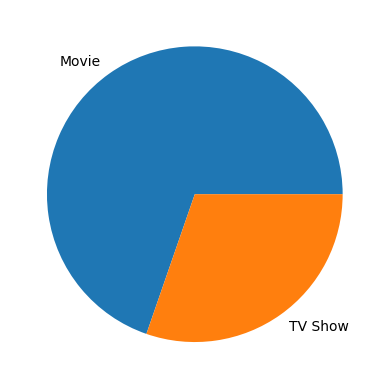

In [7]:
# implementation here
counter_movie=0
counter_tvshow=0
for i,row in netflix_df.iterrows():
    movie_type=row["type"]
    if movie_type=="Movie":
        counter_movie+=1
    elif movie_type=="TV Show":
        counter_tvshow+=1
print("Records of Movie:",counter_movie,"\nRecords of TV Show:",counter_tvshow,"\nMovie dominates the Netflix Library")
plt.pie([counter_movie,counter_tvshow],labels=["Movie","TV Show"])
plt.show()

### Q2. Time Trends(5pts)

- How has the number of titles added to Netflix changed over time?

Use the release time information from the dataset and count how many titles were added each year. Visualize the trend with a plot to show how Netflix's catalog has grown over time.

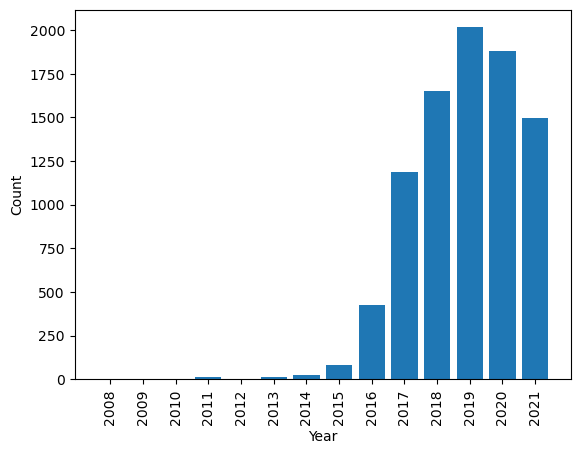

In year 2021, number of titles added was 1498.
In year 2020, number of titles added was 1879.
In year 2019, number of titles added was 2016.
In year 2018, number of titles added was 1648.
In year 2017, number of titles added was 1185.
In year 2016, number of titles added was 426.
In year 2015, number of titles added was 82.
In year 2014, number of titles added was 24.
In year 2013, number of titles added was 11.
In year 2012, number of titles added was 3.
In year 2011, number of titles added was 13.
In year 2009, number of titles added was 2.
In year 2008, number of titles added was 2.
In year 2010, number of titles added was 1.

REPORT=THE GRAPH IS LEFT SKEWED.NUMBER OF TITLES WERE LOW BETWEEN 2008-2015 BUT THEN IT QUICKLY INCREASED AND REACHED A PEAK IN 2019.IT IS UNIMODAL.


In [336]:
"""
#REPORT=THE GRAPH IS LEFT SKEWED. NUMBER OF TITLES WERE LOW BETWEEN 2008-2015 BUT THEN IT QUICKLY INCREASED AND REACHED A PEAK IN 2019.IT IS UNIMODAL.
""" 

years={}
for i,row in netflix_df.iterrows():
    year=row["year_added"]
    if year not in years:
        years[year]=1
    else:
        years[year]+=1
plt.bar(years.keys(),years.values())
plt.xticks(list(years.keys()),rotation=90)
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()
for year,count in years.items():
    print(f"In year {year}, number of titles added was {count}.")
print("\nREPORT=THE GRAPH IS LEFT SKEWED.NUMBER OF TITLES WERE LOW BETWEEN 2008-2015 BUT THEN IT QUICKLY INCREASED AND REACHED A PEAK IN 2019.IT IS UNIMODAL.")

### Q3. Genre Analysis(5pts)

- What are the 10 most common genres on Netflix?

The `listed_in` column contains the genre information. But it can contain multiple genres, seperated by commas. Split these into individual genre values and count how often each one appears. Plot the top 10 genres in a chart and describe the plot in 1-2 sentences.

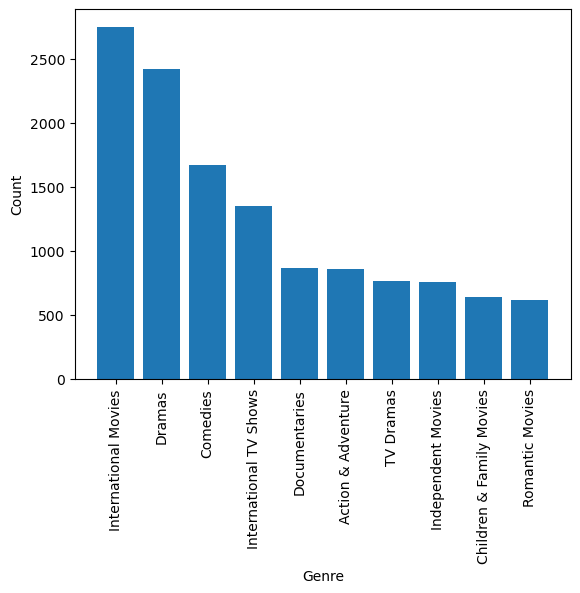

Genre International Movies appeared 2752 times.
Genre Dramas appeared 2426 times.
Genre Comedies appeared 1674 times.
Genre International TV Shows appeared 1349 times.
Genre Documentaries appeared 869 times.
Genre Action & Adventure appeared 859 times.
Genre TV Dramas appeared 762 times.
Genre Independent Movies appeared 756 times.
Genre Children & Family Movies appeared 641 times.
Genre Romantic Movies appeared 616 times.


In [338]:
"""
#REPORT:WHILE "INTERNTIONAL MOVIES" IS THE MOST COMMON TITLE,"ROMANTIC COMEDY" IS THE 10TH MOST COMMON TITLE.THE BAR CHART
VISUALISES THE DISTRIBUTION OF TOP 10 GENRES IN DESCENDING ORDER
"""

genres={}
for i,row in netflix_df.iterrows():
    genre=row["listed_in"]
    if "," not in genre:
        if genre not in genres:
            genres[genre]=1
        else:
            genres[genre]+=1
    elif "," in genre:
        genre_list=genre.split(",")
        for genre_in_list in genre_list:
            stripted_genre=genre_in_list.strip()
            if stripted_genre not in genres:
                genres[stripted_genre]=1
            elif stripted_genre in genres:
                genres[stripted_genre]+=1
sorted_genres=sorted(genres.items(),key=lambda x:x[1],reverse=True)
top10_sorted_genres=dict(sorted_genres[:10])
plt.bar(top10_sorted_genres.keys(),top10_sorted_genres.values())
plt.xticks(rotation=90)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()
for genre,count in top10_sorted_genres.items():
    print(f"Genre {genre} appeared {count} times.")
        
    

### Q4. Geographic Patterns(5pts)

- Which 10 countries have produced the most Netflix titles?

Some titles are produced by multiple countries (e.g., "France, Germany"). Ensure you account for all countries evenly by splitting the entries before counting. Show the top contributors using a chart.

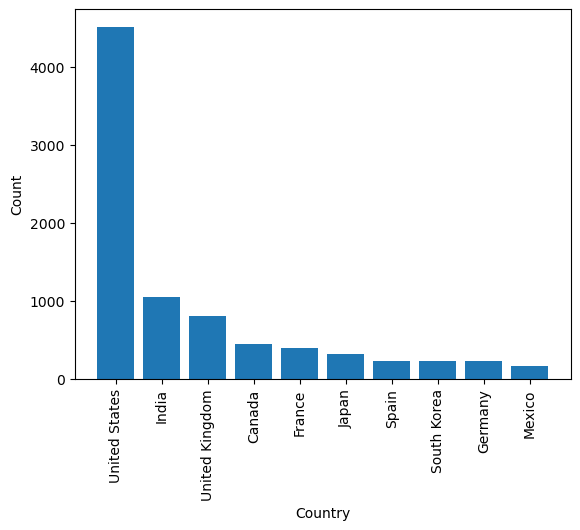

Country United States produced 4510 films.
Country India produced 1046 films.
Country United Kingdom produced 805 films.
Country Canada produced 445 films.
Country France produced 393 films.
Country Japan produced 316 films.
Country Spain produced 232 films.
Country South Korea produced 231 films.
Country Germany produced 226 films.
Country Mexico produced 169 films.


In [102]:
# implementation here
countries={}
for i,row in netflix_df.iterrows():
    country=row["country"]
    if "," not in country:
        if country not in countries:
            countries[country]=1
        else:
            countries[country]+=1
    elif "," in country:
        country_list=country.split(",")
        for country_in_list in country_list:
            stripted_country=country_in_list.strip()
            if stripted_country not in countries:
                countries[stripted_country]=1
            elif stripted_country in countries:
                countries[stripted_country]+=1
sorted_countries=sorted(countries.items(),key=lambda x:x[1],reverse=True)
top10_sorted_countries=dict(sorted_countries[:10])
plt.bar(top10_sorted_countries.keys(),top10_sorted_countries.values())
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()
for country,count in top10_sorted_countries.items():
    print(f"Country {country} produced {count} films.")

### Q5. Titles Added per Month(5pts)

- How many titles are added to Netflix in each month?

Use the release time information from the dataset. And report the added titles by "Month-Year" (e.g. "June-2016) then present it by a chart. You will manipulate the data to get that information. Then describe&comment on the chart with 1-2 sentences.

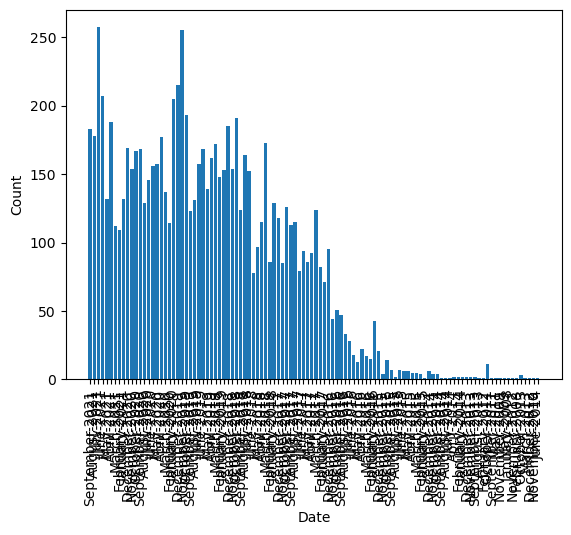

In September-2021, number of titles added was 183.
In August-2021, number of titles added was 178.
In July-2021, number of titles added was 257.
In June-2021, number of titles added was 207.
In May-2021, number of titles added was 132.
In April-2021, number of titles added was 188.
In March-2021, number of titles added was 112.
In February-2021, number of titles added was 109.
In January-2021, number of titles added was 132.
In December-2020, number of titles added was 169.
In November-2020, number of titles added was 154.
In October-2020, number of titles added was 167.
In September-2020, number of titles added was 168.
In August-2020, number of titles added was 129.
In July-2020, number of titles added was 146.
In June-2020, number of titles added was 156.
In May-2020, number of titles added was 157.
In April-2020, number of titles added was 177.
In March-2020, number of titles added was 137.
In February-2020, number of titles added was 114.
In January-2020, number of titles added wa

In [350]:
# COMMENT= I CALCULATED HOW MANY TITLES ARE ADDED EACH YEAR EACH MONTH BUT COULDN'T SORT THE DATA SO THERE IS A MISSING PART IN MY ANSWER. 
#          I CALCULATED COUNTS SO MAYBE I GET PARTIAL CREDITS

dates={}
for i,row in netflix_df.iterrows():
    month=row["month_name_added"]
    year=row["year_added"]
    date=f"{month}-{year}"
    if date not in dates:
        dates[date]=1
    else:
        dates[date]+=1
plt.bar(dates.keys(),dates.values())
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()
for date,count in dates.items():
    print(f"In {date}, number of titles added was {count}.")


### Q6. Country Contribution Over Time(10pts)

- Identify the top 10 content producing countries.
- For the top 5 producing countries, how has the number of titles added changed year by year?

Identify the top 10 countries by counting total contents. Plot the results. Then identify the 5 countries with the most titles overall, and filter the dataset to just those. Group by both year added and country, and plot separate lines to compare their trends over time. Visualize the result and describe&comment on the chart with 1-2 sentences.

NOTE: Because top10 is graphed in Q4, I only listed top5 in this question!


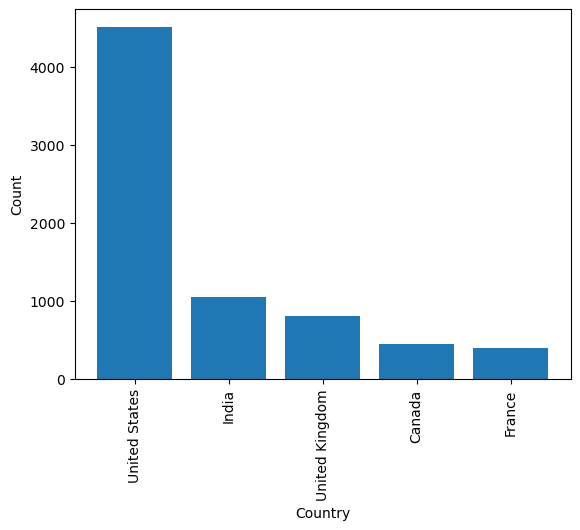

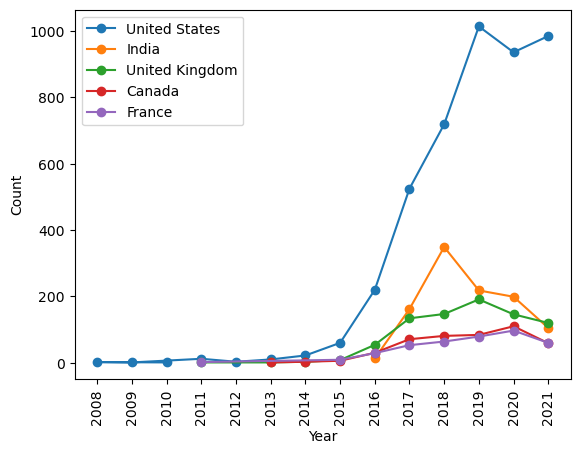


United States:
Year= 2021 , Count= 985
Year= 2020 , Count= 936
Year= 2019 , Count= 1014
Year= 2018 , Count= 719
Year= 2017 , Count= 525
Year= 2016 , Count= 220
Year= 2015 , Count= 60
Year= 2014 , Count= 22
Year= 2013 , Count= 10
Year= 2012 , Count= 3
Year= 2011 , Count= 12
Year= 2009 , Count= 1
Year= 2008 , Count= 2
Year= 2010 , Count= 1

India:
Year= 2021 , Count= 105
Year= 2020 , Count= 199
Year= 2019 , Count= 218
Year= 2018 , Count= 349
Year= 2017 , Count= 162
Year= 2016 , Count= 13

United Kingdom:
Year= 2021 , Count= 120
Year= 2020 , Count= 146
Year= 2019 , Count= 191
Year= 2018 , Count= 147
Year= 2017 , Count= 134
Year= 2016 , Count= 54
Year= 2015 , Count= 8
Year= 2014 , Count= 3
Year= 2013 , Count= 1
Year= 2011 , Count= 1

Canada:
Year= 2021 , Count= 59
Year= 2020 , Count= 110
Year= 2019 , Count= 84
Year= 2018 , Count= 81
Year= 2017 , Count= 71
Year= 2016 , Count= 30
Year= 2015 , Count= 6
Year= 2014 , Count= 3
Year= 2013 , Count= 1

France:
Year= 2021 , Count= 60
Year= 2020 , C

In [340]:
#COMMENT= IN THE LINE CHART WHILE UNITED STATES HAVE A SIGNIICANTLY FASTER GROW THROUGH YEARS, OTHER 4 COUNTRIES ALSO GREW BUT IN A SHORTER MANNER.
#         ALSO FOR ALL, COUNT STARTED INCREASING SHRPLY IN 2015-2016 AND REACHED A PEAK AROUND 2018-2019 THEN LOWERED UNTILL 2021.
countries={}
for i,row in netflix_df.iterrows():
    country=row["country"]
    if "," not in country:
        if country not in countries:
            countries[country]=1
        else:
            countries[country]+=1
    elif "," in country:
        country_list=country.split(",")
        for country_in_list in country_list:
            stripted_country=country_in_list.strip()
            if stripted_country not in countries:
                countries[stripted_country]=1
            elif stripted_country in countries:
                countries[stripted_country]+=1
sorted_countries=sorted(countries.items(),key=lambda x:x[1],reverse=True)
top5_sorted_country=dict(sorted_countries[:5])
plt.bar(top5_sorted_country.keys(),top5_sorted_country.values())
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Count")
print("NOTE: Because top10 is graphed in Q4, I only listed top5 in this question!")
plt.show()
top5_sorted_countries={"United States":{},"India":{},"United Kingdom":{},"Canada":{},"France":{}}
for i,row in netflix_df.iterrows():
    year=row["year_added"]
    countries=row["country"].split(",")
    for country in countries:
        country_strip=country.strip()
        if country_strip in top5_sorted_countries:
            if year not in top5_sorted_countries[country_strip]:
                top5_sorted_countries[country_strip][year]=1
            else:
                top5_sorted_countries[country_strip][year]+=1
plt.plot(top5_sorted_countries["United States"].keys(),top5_sorted_countries["United States"].values(),marker="o",label="United States")
plt.plot(top5_sorted_countries["India"].keys(),top5_sorted_countries["India"].values(),marker="o",label="India")
plt.plot(top5_sorted_countries["United Kingdom"].keys(),top5_sorted_countries["United Kingdom"].values(),marker="o",label="United Kingdom")
plt.plot(top5_sorted_countries["Canada"].keys(),top5_sorted_countries["Canada"].values(),marker="o",label="Canada")
plt.plot(top5_sorted_countries["France"].keys(),top5_sorted_countries["France"].values(),marker="o",label="France")
plt.xlabel("Year")
plt.ylabel("Count")
plt.xticks(sorted(list(top5_sorted_countries["United States"].keys())),rotation=90)
plt.legend()
plt.show()
for country,country_info in top5_sorted_countries.items():
    print(f"\n{country}:")
    for year,count in country_info.items():
        print(f"Year= {year} , Count= {count}")


### Q7. Average Movie Duration Over Time(5pts)

- How has the average movie duration changed over the years?

Focus only movies on the dataset (ignore TV Shows). Convert the duration column to a numeric value. And group by release year to compute the average movie length per year and visualize the trend.
Describe the chart with 1-2 sentences.

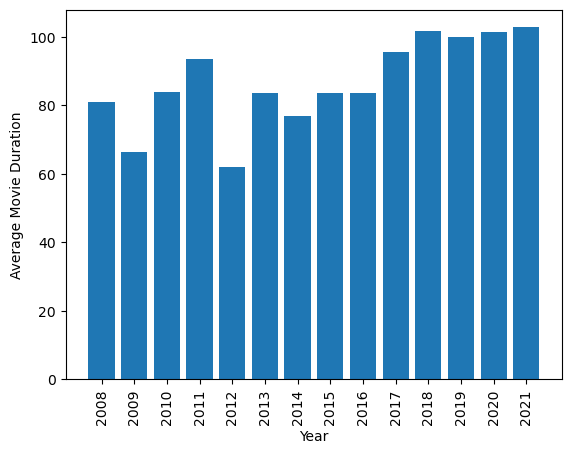

In year 2021 average movie duration was 102.84.
In year 2020 average movie duration was 101.59.
In year 2019 average movie duration was 99.92.
In year 2018 average movie duration was 101.74.
In year 2017 average movie duration was 95.73.
In year 2016 average movie duration was 83.61.
In year 2015 average movie duration was 83.57.
In year 2014 average movie duration was 77.00.
In year 2013 average movie duration was 83.50.
In year 2012 average movie duration was 62.00.
In year 2011 average movie duration was 93.46.
In year 2009 average movie duration was 66.50.
In year 2008 average movie duration was 81.00.
In year 2010 average movie duration was 84.00.


In [344]:
# COMMENT= AVERAGE MOVIE DURATIONS WAS A BIT VARIABLE DURING 2008-20016 BUT MORE CLOSE AND STABLE DURING 2017-2021. BUT IN GENERAL THERE ARE NO
#          ENORMOUS FLACTUATIONS IN AVERAGE MOVIE DURATION, THERE IS A MORE STEADY AND BALANCED DISTRIBUTION.

year_duration_dict={}
year_count_dict={}
for i,row in netflix_df.iterrows():
    if row["type"]=="Movie":
        year=row["year_added"]
        duration=int(row["duration"].split()[0])
        if year not in year_duration_dict:
            year_duration_dict[year]=duration
            year_count_dict[year]=1
        else:
            year_duration_dict[year]+=duration
            year_count_dict[year]+=1
for year in year_duration_dict:
    year_duration_dict[year]=year_duration_dict[year]/year_count_dict[year]
plt.bar(year_duration_dict.keys(),year_duration_dict.values())
plt.xticks(list(year_duration_dict.keys()),rotation=90)
plt.xlabel("Year")
plt.ylabel("Average Movie Duration")
plt.show()
for year,average_duration in year_duration_dict.items():
    print(f"In year {year} average movie duration was {average_duration:.2f}.")

### Q8. TV Shows - Average Number of Seasons per Country(5pts)

- For each country, what is the average number of seasons in its TV Shows?

Focus only TV Shows on the dataset. The duration column contains the number of seasons (e.g. "3 Seasons"). Parse this information to a usable format. Then compute the average per country and visualize the top 10 countries. This gives insight about the countries tends to produce longer-running TV series.

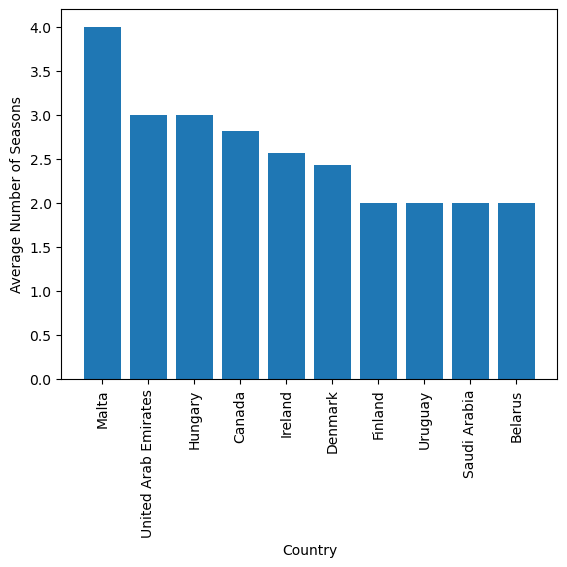

In Malta average number of seasons was 4.00 .
In United Arab Emirates average number of seasons was 3.00 .
In Hungary average number of seasons was 3.00 .
In Canada average number of seasons was 2.82 .
In Ireland average number of seasons was 2.57 .
In Denmark average number of seasons was 2.43 .
In Finland average number of seasons was 2.00 .
In Uruguay average number of seasons was 2.00 .
In Saudi Arabia average number of seasons was 2.00 .
In Belarus average number of seasons was 2.00 .


In [346]:

country_duration_dict={}
country_count_dict={}
for i,row in netflix_df.iterrows():
    if row["type"]=="TV Show":
        country=row["country"].split(",")
        duration=int(row["duration"].split()[0])
        for c in country:
            country_name=c.strip()
            if country_name not in country_duration_dict:
                country_duration_dict[country_name]=duration
                country_count_dict[country_name]=1
            else:
                country_duration_dict[country_name]+=duration
                country_count_dict[country_name]+=1
for country in country_duration_dict:
    country_duration_dict[country]=country_duration_dict[country]/country_count_dict[country]
sorted_duration=sorted(country_duration_dict.items(),key=lambda x:x[1],reverse=True)
top10_sorted_duration=dict(sorted_duration[:10])
plt.bar(top10_sorted_duration.keys(),top10_sorted_duration.values())
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Average Number of Seasons")
plt.show()
for country,average_seasons in top10_sorted_duration.items():
    print(f"In {country} average number of seasons was {average_seasons:.2f} .")



### Q9. Genre Popularity Shift Over Years(5pts)

- How has the popularity of the most popular 3 genres changed over time?

Choose 3 most popular genres (check Q3) and analyze how often titles of each genre were added per year. This will require splitting the multi-genre column, filtering by the chosen genres, and grouping by year. Plot a multi-line chart to show the trend on these genres over years.

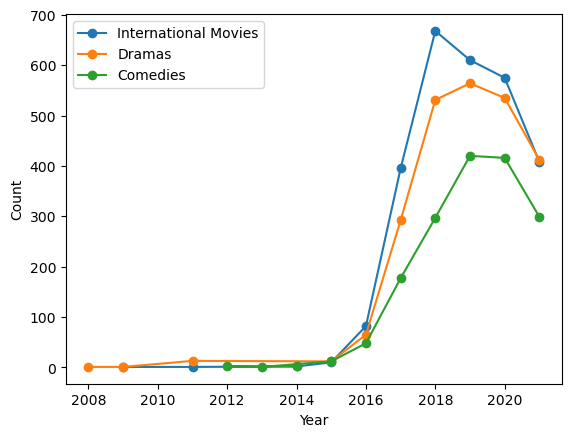


International Movies:
Year= 2021 , Count= 408
Year= 2020 , Count= 575
Year= 2019 , Count= 610
Year= 2018 , Count= 668
Year= 2017 , Count= 395
Year= 2016 , Count= 82
Year= 2015 , Count= 10
Year= 2014 , Count= 2
Year= 2011 , Count= 1
Year= 2009 , Count= 1

Dramas:
Year= 2021 , Count= 412
Year= 2020 , Count= 535
Year= 2019 , Count= 564
Year= 2018 , Count= 531
Year= 2017 , Count= 292
Year= 2016 , Count= 65
Year= 2015 , Count= 12
Year= 2011 , Count= 13
Year= 2009 , Count= 1
Year= 2008 , Count= 1

Comedies:
Year= 2021 , Count= 299
Year= 2020 , Count= 416
Year= 2019 , Count= 420
Year= 2018 , Count= 297
Year= 2017 , Count= 177
Year= 2016 , Count= 48
Year= 2015 , Count= 12
Year= 2013 , Count= 1
Year= 2012 , Count= 2
Year= 2014 , Count= 2


In [348]:
# COMMENT= IN Q3, I FOUND TOP3 GENRES SO DIDN'T FIND THEM AGAIN IN THIS QUESTION AND DIRECTLY USED THAT INFORMATION. IN THIS MULTI-LINE GRAPH WE
#          COMPARED THE POPULARITY OF THESE TOP3 GENRES THROUGH YEARS, EACH LINE WITH DIFFERENT COLOUR REPRESENTING ONE OF THE GENRE.
sorted_top3_genres={"International Movies":{},"Dramas":{},"Comedies":{}}
for i,row in netflix_df.iterrows():
    year=row["year_added"]
    genres=row["listed_in"].split(",")
    for genre in genres:
        genre_strip=genre.strip()
        if genre_strip in sorted_top3_genres:
            if year not in sorted_top3_genres[genre_strip]:
                sorted_top3_genres[genre_strip][year]=1
            else:
                sorted_top3_genres[genre_strip][year]+=1
plt.plot(sorted_top3_genres["International Movies"].keys(),sorted_top3_genres["International Movies"].values(),marker="o",label="International Movies")
plt.plot(sorted_top3_genres["Dramas"].keys(),sorted_top3_genres["Dramas"].values(),marker="o",label="Dramas")
plt.plot(sorted_top3_genres["Comedies"].keys(),sorted_top3_genres["Comedies"].values(),marker="o",label="Comedies")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.show()
for genre,genre_info in sorted_top3_genres.items():
    print(f"\n{genre}:")
    for year,count in genre_info.items():
        print(f"Year= {year} , Count= {count}")
        





# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw2.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.